<a href="https://colab.research.google.com/github/Manjunath727/DL/blob/master/3_LinearRegression/LR_MatrixInversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

slope: 1.0517903343754542
y_intercept : -0.4168928663862149


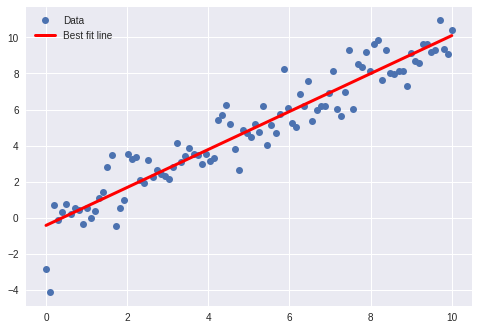

In [5]:
# 3.1 Linear Regression with matrix inverse method

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

sess = tf.Session()

# Create data
x_vals = np.linspace(0,10,100)
y_vals = x_vals + np.random.normal(0,1,100)

# Create Matrices for inverse method
x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1,100)))
A = np.column_stack((x_vals_column, ones_column))
b = np.transpose(np.matrix(y_vals))

# Turn A and b matrices into tensors
A_tensor = tf.constant(A)
b_tensor = tf.constant(b)

# Use tensorflow to solve this via matrix inverse method
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)
tA_A_inv = tf.matrix_inverse(tA_A)
product = tf.matmul(tA_A_inv, tf.transpose(A_tensor))
solution = tf.matmul(product, b_tensor)
solution_eval = sess.run(solution)

# Extract coefficients from solution, the slope and y_intercept
slope = solution_eval[0][0]
y_intercept = solution_eval[1][0]
print('slope: ' + str(slope))
print('y_intercept : ' + str(y_intercept))


best_fit = []
for i in x_vals:
  best_fit.append(slope*i + y_intercept)
plt.plot(x_vals, y_vals, 'o', label='Data')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.show()